# Data Cleaning

## 1. Loading the Data

In [142]:
import pandas as pd
import numpy as np

In [143]:
forest_area = pd.read_csv("dataset/Forest Area.csv")
freshwater = pd.read_csv("dataset/Freshwater.csv", skiprows=3)
gdp_per_capita = pd.read_csv("dataset/gdp_per_capita.csv")
governance = pd.read_csv("dataset/Governance.csv")
human_development_index = pd.read_csv("dataset/human-development-index.csv")
sustainable_energy = pd.read_csv("dataset/Sustainable energy for all.csv", skiprows=3)
emissions = pd.read_csv("dataset/trends_in_greenhouse_gas_emissions.csv", skiprows=3)

## 2. Choosing Relevant Variables

This is done based on the theoretical framework. As the datasets I have mostly encompasses a wide range of different variables, I will be omitting the ones that are not used and also take the most recent data only.

### Forest Area - 2020 Forest Area

In [144]:
# Forest area
forest_area_filtered = forest_area[['Country and Area', 'Forest Area, 2020 (1000 ha)']]
forest_area_filtered = forest_area_filtered.rename(columns={'Country and Area': 'Country'})
forest_area_filtered.head()

,Country,"Forest Area, 2020 (1000 ha)"
0,WORLD,4058930.81
1,Afghanistan,1208.44
2,Albania,788.90
3,Algeria,1949.00
4,American Samoa,17.13


### Freshwater

In [145]:
freshwater_filtered = freshwater[['Country', 'Internal renewable freshwater resources flows 2020']]
freshwater_filtered.head()

,Country,Internal renewable freshwater resources flows 2020
0,Afghanistan,47.2
1,Albania,26.9
2,Algeria,11.2
3,American Samoa,..
4,Andorra,0.3


### GDP per Capita

In [146]:
gdp_per_capita_filtered = gdp_per_capita[['Country Name', '2021 [YR2021]']]
gdp_per_capita_filtered = gdp_per_capita_filtered.rename(columns={'Country Name': 'Country'})
gdp_per_capita_filtered = gdp_per_capita_filtered.rename(columns={'2021 [YR2021]': 'GDP per Capita 2021'})
gdp_per_capita_filtered.head()

,Country,GDP per Capita 2021
0,Afghanistan,355.777826392648
1,Albania,6377.20309553753
2,Algeria,3700.31469728198
3,American Samoa,16653.7137781725
4,Andorra,42072.3194231234


### Governance

In [147]:
governance_filtered = governance[['Country and area', 'Paris Agreement', 'UN Framework Convention on Climate Change']]
governance_filtered = governance_filtered.rename(columns={'Country and area': 'Country'})
governance_filtered.head()

,Country,Paris Agreement,UN Framework Convention on Climate Change
0,Afghanistan,2017,2002
1,Albania,2016,1994
2,Algeria,2016,1993
3,Andorra,2017,2011
4,Angola,...,2000


### Human Development Index

In [148]:
human_development_index_filtered = human_development_index.loc[human_development_index['Year'] == 2022]
human_development_index_filtered = human_development_index_filtered[['Entity', 'Human Development Index']]
human_development_index_filtered = human_development_index_filtered.rename(columns={'Entity': 'Country'})
human_development_index_filtered.head()

,Country,Human Development Index
32,Afghanistan,0.462
65,Albania,0.789
98,Algeria,0.745
121,Andorra,0.884
145,Angola,0.591


### Sustainable Energy

In [149]:
sustainable_energy_filtered = sustainable_energy[['Country', 'Access to clean fuels and technologies for cooking 2021', 'Renewable energy consumption 2020']]
sustainable_energy_filtered.head()

,Country,Access to clean fuels and technologies for cooking 2021,Renewable energy consumption 2020
0,Afghanistan,35.4,17.6
1,Albania,83.7,44.6
2,Algeria,99.7,0.2
3,American Samoa,..,0.5
4,Andorra,100,21.9


### Emissions

In [150]:
emissions_filtered = emissions[['Country', 'Carbon dioxide emissions 2020', 'Methane emissions 2020', 'Nitrous oxide emissions 2020']]
emissions_filtered.head()

,Country,Carbon dioxide emissions 2020,Methane emissions 2020,Nitrous oxide emissions 2020
0,Afghanistan,8709.47,16222.03596,4863.386801
1,Albania,4383.2,2692.195886,1015.186729
2,Algeria,161563,86543.92362,12578.7476
3,American Samoa,..,..,..
4,Andorra,448.884399,53.600959,1.758811


## 3. Merge Datasets

Remove unnecessary rows after last country (Zimbabwe) for Freshwater, Sustainable Energy, and Emissions dataset

In [151]:
freshwater_filtered = freshwater_filtered.loc[:freshwater_filtered[freshwater_filtered['Country'] == 'Zimbabwe'].index[0]]
freshwater_filtered

,Country,Internal renewable freshwater resources flows 2020
0,Afghanistan,47.2
1,Albania,26.9
2,Algeria,11.2
3,American Samoa,..
4,Andorra,0.3
...,...,...
209,Virgin Islands (U.S.),..
210,West Bank and Gaza,0.8
211,"Yemen, Rep.",2.1
212,Zambia,80.2


In [152]:
sustainable_energy_filtered = sustainable_energy_filtered.loc[:sustainable_energy_filtered[sustainable_energy_filtered['Country'] == 'Zimbabwe'].index[0]]
sustainable_energy_filtered

,Country,Access to clean fuels and technologies for cooking 2021,Renewable energy consumption 2020
0,Afghanistan,35.4,17.6
1,Albania,83.7,44.6
2,Algeria,99.7,0.2
3,American Samoa,..,0.5
4,Andorra,100,21.9
...,...,...,...
209,Virgin Islands (U.S.),..,5.1
210,West Bank and Gaza,..,15
211,"Yemen, Rep.",61.3,3.5
212,Zambia,10.2,81.8


In [153]:
emissions_filtered = emissions_filtered.loc[:emissions_filtered[emissions_filtered['Country'] == 'Zimbabwe'].index[0]]
emissions_filtered

,Country,Carbon dioxide emissions 2020,Methane emissions 2020,Nitrous oxide emissions 2020
0,Afghanistan,8709.47,16222.03596,4863.386801
1,Albania,4383.2,2692.195886,1015.186729
2,Algeria,161563,86543.92362,12578.7476
3,American Samoa,..,..,..
4,Andorra,448.884399,53.600959,1.758811
...,...,...,...,...
209,Virgin Islands (U.S.),..,..,..
210,West Bank and Gaza,..,..,..
211,"Yemen, Rep.",9960.1,10542.15376,3364.858401
212,Zambia,7607.1,15448.75233,12363.49464


Get standardised country names map to merge data into one CSV file as each datasets might have different conventions on naming the countries. 

I did this with the help of GPT-4, but it was not entirely accurate so I also had to input some of the key-value pairs manually.

In [154]:
country_name_mapping = {
    "Bahamas, The": "Bahamas",
    "Bolivia": "Bolivia (Plurinational State of)",
    "Brunei": "Brunei Darussalam",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Congo, Democratic Republic of the": "Democratic Republic of the Congo",
    "The Democratic Republic of the Congo": "Democratic Republic of the Congo",
    "Democratic Republic of Congo": "Democratic Republic of the Congo",
    "Congo, Rep.": "Congo",
    "Congo, Republic of": "Congo",
    "Cape Verde": "Cabo Verde",
    "Cote d'Ivoire": "Côte d’Ivoire",
    "Ivory Coast": "Côte d’Ivoire",
    "Czech Republic": "Czechia",
    "Gambia, The": "Gambia",
    "Korea, Rep.": "Republic of Korea",
    "Korea, Republic of": "Republic of Korea",
    "South Korea": "Republic of Korea",
    "Korea, Dem. People's Rep.": "Democratic People's Republic of Korea",
    "North Korea": "Democratic People's Republic of Korea",
    "Iran, Islamic Rep.": "Iran (Islamic Republic of)",
    "Iran": "Iran (Islamic Republic of)",
    "Lao PDR": "Lao People's Democratic Republic",
    "Lao": "Lao People's Democratic Republic",
    "Laos": "Lao People's Democratic Republic",
    "Micronesia, Fed. Sts.": "Micronesia (Federated States of)",
    "Micronesia": "Micronesia (Federated States of)",
    "Micronesia (country)": "Micronesia (Federated States of)",
    "Moldova": "Republic of Moldova",
    "Palestine, State of": "State of Palestine",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Turkiye": "Turkey",
    "Tanzania": "United Republic of Tanzania",
    "Venezuela, RB": "Venezuela",
    "Yemen, Rep.": "Yemen",
    "Syria": "Syrian Arab Republic",
    "Egypt, Arab Rep.": "Egypt",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Slovak Republic": "Slovakia",
    "Russia": "Russian Federation",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "United States": "United States of America",
    "East Timor": "Timor-Leste",
    "Vietnam": "Viet Nam",
    "Venezuela": "Venezuela (Bolivarian Republic of)",
    "Venezuela, RB": "Venezuela (Bolivarian Republic of)",
    "West Bank and Gaza": "State of Palestine",
    "Palestine": "State of Palestine",
}

In [155]:
print("Forest Area: ", len(forest_area_filtered))
print("Freshwater: ", len(freshwater_filtered))
print("GDP per Capita: ", len(gdp_per_capita_filtered))
print("Governance: ", len(governance_filtered))
print("HDI: ", len(human_development_index_filtered))
print("Sustainable Energy: ", len(sustainable_energy_filtered))
print("Emissions: ", len(emissions_filtered))

Forest Area:  237
Freshwater:  214
GDP per Capita:  271
Governance:  194
HDI:  204
Sustainable Energy:  214
Emissions:  214


As the Governance dataset has the least amount of countries, I'm going to use countries from the Governance dataset as the base country list for the merged data.

In [156]:
countries_list = governance_filtered['Country'].unique()
countries_list

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Côte d’Ivoire',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'G

Map the country names from other datasets to match the country name in the Governance dataset.

In [157]:
forest_area_filtered.loc[:, 'Country'] = forest_area_filtered['Country'].replace(country_name_mapping)
forest_area_filtered = forest_area_filtered[forest_area_filtered['Country'].isin(countries_list)]
len(forest_area_filtered)

194

In [158]:
freshwater_filtered.loc[:, 'Country'] = freshwater_filtered['Country'].replace(country_name_mapping)
freshwater_filtered = freshwater_filtered[freshwater_filtered['Country'].isin(countries_list)]
len(freshwater_filtered)

193

In [159]:
gdp_per_capita_filtered.loc[:, 'Country'] = gdp_per_capita_filtered['Country'].replace(country_name_mapping)
gdp_per_capita_filtered = gdp_per_capita_filtered[gdp_per_capita_filtered['Country'].isin(countries_list)]
len(gdp_per_capita_filtered)

194

In [160]:
human_development_index_filtered.loc[:, 'Country'] = human_development_index_filtered['Country'].replace(country_name_mapping)
human_development_index_filtered = human_development_index_filtered[human_development_index_filtered['Country'].isin(countries_list)]
len(human_development_index_filtered)

192

In [161]:
sustainable_energy_filtered.loc[:, 'Country'] = sustainable_energy_filtered['Country'].replace(country_name_mapping)
sustainable_energy_filtered = sustainable_energy_filtered[sustainable_energy_filtered['Country'].isin(countries_list)]
len(sustainable_energy_filtered)

193

In [162]:
emissions_filtered.loc[:, 'Country'] = emissions_filtered['Country'].replace(country_name_mapping)
emissions_filtered = emissions_filtered[emissions_filtered['Country'].isin(countries_list)]
len(emissions_filtered)

193

In [163]:
freshwater_countries = freshwater_filtered['Country'].unique()
missing_countries = list(set(countries_list) - set(freshwater_countries))
missing_countries

['Nauru']

Input missing country rows with null value to the dataset

In [164]:
nauru_df = pd.DataFrame([['Nauru', np.nan]], columns=['Country', 'Internal renewable freshwater resources flows 2020'])
freshwater_filtered = pd.concat([freshwater_filtered, nauru_df], ignore_index=True)

In [165]:
sustainable_energy_countries = sustainable_energy_filtered['Country'].unique()
missing_countries = list(set(countries_list) - set(sustainable_energy_countries))
missing_countries

['Nauru']

In [166]:
nauru_df = pd.DataFrame([['Nauru', np.nan, np.nan]], columns=['Country', 'Access to clean fuels and technologies for cooking 2021', 'Renewable energy consumption 2020'])
sustainable_energy_filtered = pd.concat([sustainable_energy_filtered, nauru_df], ignore_index=True)

In [167]:
emissions_countries = emissions_filtered['Country'].unique()
missing_countries = list(set(countries_list) - set(emissions_countries))
missing_countries

['Nauru']

In [168]:
nauru_df = pd.DataFrame([['Nauru', np.nan, np.nan, np.nan]], columns=['Country', 'Carbon dioxide emissions 2020', 'Methane emissions 2020', 'Nitrous oxide emissions 2020'])
emissions_filtered = pd.concat([emissions_filtered, nauru_df], ignore_index=True)

In [169]:
hdi_countries = human_development_index_filtered['Country'].unique()
missing_countries = list(set(countries_list) - set(hdi_countries))
missing_countries

['Monaco', "Democratic People's Republic of Korea"]

In [170]:
monaco_df = pd.DataFrame([['Monaco', np.nan]], columns=['Country', 'Human Development Index'])
dprk_df = pd.DataFrame([["Democratic People's Republic of Korea", np.nan]], columns=['Country', 'Human Development Index'])
human_development_index_filtered = pd.concat([human_development_index_filtered, monaco_df, dprk_df], ignore_index=True)

So in conclusion, I am going to have a total of 194 countries included in the data after inputting the missing countries for each dataset.

In [171]:
from functools import reduce

In [172]:
dfs = [forest_area_filtered, freshwater_filtered, gdp_per_capita_filtered, governance_filtered, human_development_index_filtered, sustainable_energy_filtered, emissions_filtered]
merge_dfs = lambda left, right: pd.merge(left, right, on='Country', how='inner')
lcdci_df = reduce(merge_dfs, dfs)
lcdci_df.head()

,Country,"Forest Area, 2020 (1000 ha)",Internal renewable freshwater resources flows 2020,GDP per Capita 2021,Paris Agreement,UN Framework Convention on Climate Change,Human Development Index,Access to clean fuels and technologies for cooking 2021,Renewable energy consumption 2020,Carbon dioxide emissions 2020,Methane emissions 2020,Nitrous oxide emissions 2020
0,Afghanistan,1208.44,47.2,355.777826392648,2017,2002,0.462,35.4,17.6,8709.47,16222.03596,4863.386801
1,Albania,788.90,26.9,6377.20309553753,2016,1994,0.789,83.7,44.6,4383.2,2692.195886,1015.186729
2,Algeria,1949.00,11.2,3700.31469728198,2016,1993,0.745,99.7,0.2,161563,86543.92362,12578.7476
3,Andorra,16.00,0.3,42072.3194231234,2017,2011,0.884,100,21.9,448.884399,53.600959,1.758811
4,Angola,66607.38,148,1927.47407832091,...,2000,0.591,50,61,19814.5,32703.23811,17757.86784


Rename column headings for consistency

In [173]:
lcdci_df = lcdci_df.rename(columns={'Country': 'country'})
lcdci_df = lcdci_df.rename(columns={'Forest Area, 2020 (1000 ha)': 'forest_area'})
lcdci_df = lcdci_df.rename(columns={'Internal renewable freshwater resources flows 2020': 'freshwater'})
lcdci_df = lcdci_df.rename(columns={'GDP per Capita 2021': 'gdp_per_capita'})
lcdci_df = lcdci_df.rename(columns={'Paris Agreement': 'paris_agreement'})
lcdci_df = lcdci_df.rename(columns={'UN Framework Convention on Climate Change': 'unfccc'})
lcdci_df = lcdci_df.rename(columns={'Human Development Index': 'hdi'})
lcdci_df = lcdci_df.rename(columns={'Access to clean fuels and technologies for cooking 2021': 'cooking_clean_fuel_and_technologies_access'})
lcdci_df = lcdci_df.rename(columns={'Renewable energy consumption 2020': 'renewable_energy_consumption'})
lcdci_df = lcdci_df.rename(columns={'Carbon dioxide emissions 2020': 'co2_emissions'})
lcdci_df = lcdci_df.rename(columns={'Methane emissions 2020': 'methane_emissions'})
lcdci_df = lcdci_df.rename(columns={'Nitrous oxide emissions 2020': 'nitrous_oxide_emissions'})


## 4. Handling Missing Values

In [174]:
lcdci_df.dtypes

country                                        object
forest_area                                   float64
freshwater                                     object
gdp_per_capita                                 object
paris_agreement                                object
unfccc                                          int64
hdi                                           float64
cooking_clean_fuel_and_technologies_access     object
renewable_energy_consumption                   object
co2_emissions                                  object
methane_emissions                              object
nitrous_oxide_emissions                        object
dtype: object

Handle missing values in columns by marking it as NaN and convert to suitable type

In [175]:
lcdci_df["freshwater"] = lcdci_df["freshwater"].replace("..", np.nan)
lcdci_df["freshwater"] = lcdci_df["freshwater"].astype(float)

In [176]:
lcdci_df["gdp_per_capita"] = lcdci_df["gdp_per_capita"].replace("..", np.nan)
lcdci_df["gdp_per_capita"] = lcdci_df["gdp_per_capita"].astype(float)

* One hot encode the Paris Agreement (0: not agreed, 1: agreed)

In [177]:
lcdci_df["paris_agreement"] = lcdci_df["paris_agreement"].replace("..", 0) 
lcdci_df["paris_agreement"] = lcdci_df["paris_agreement"].apply(lambda x: 1 if x != 0 else 0) 

In [178]:
lcdci_df["cooking_clean_fuel_and_technologies_access"] = lcdci_df["cooking_clean_fuel_and_technologies_access"].replace("..", np.nan)
lcdci_df["cooking_clean_fuel_and_technologies_access"] = lcdci_df["cooking_clean_fuel_and_technologies_access"].astype(float)

In [179]:
lcdci_df["renewable_energy_consumption"] = lcdci_df["renewable_energy_consumption"].replace("..", np.nan)
lcdci_df["renewable_energy_consumption"] = lcdci_df["renewable_energy_consumption"].astype(float)

In [180]:
lcdci_df["co2_emissions"] = lcdci_df["co2_emissions"].replace("..", np.nan)
lcdci_df["co2_emissions"] = lcdci_df["co2_emissions"].astype(float)

In [181]:
lcdci_df["methane_emissions"] = lcdci_df["methane_emissions"].replace("..", np.nan)
lcdci_df["methane_emissions"] = lcdci_df["methane_emissions"].astype(float)

In [182]:
lcdci_df["nitrous_oxide_emissions"] = lcdci_df["nitrous_oxide_emissions"].replace("..", np.nan)
lcdci_df["nitrous_oxide_emissions"] = lcdci_df["nitrous_oxide_emissions"].astype(float)

In [183]:
lcdci_df.isnull().sum()

country                                        0
forest_area                                    0
freshwater                                    13
gdp_per_capita                                 5
paris_agreement                                0
unfccc                                         0
hdi                                            2
cooking_clean_fuel_and_technologies_access     6
renewable_energy_consumption                   3
co2_emissions                                  4
methane_emissions                              4
nitrous_oxide_emissions                        4
dtype: int64

In [184]:
lcdci_df.dtypes

country                                        object
forest_area                                   float64
freshwater                                    float64
gdp_per_capita                                float64
paris_agreement                                 int64
unfccc                                          int64
hdi                                           float64
cooking_clean_fuel_and_technologies_access    float64
renewable_energy_consumption                  float64
co2_emissions                                 float64
methane_emissions                             float64
nitrous_oxide_emissions                       float64
dtype: object

In [185]:
# Filter rows where freshwater is empty
freshwater_missing = lcdci_df[lcdci_df['freshwater'].isnull()]
freshwater_missing


,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
89,Kiribati,1.18,NaN,1766.144289,1,1995,0.628,12.4,42.8,56.900000,23.209951,5.124415
98,Liechtenstein,6.70,NaN,197504.548936,1,1994,0.942,NaN,55.2,141.996093,2.588257,0.870988
107,Marshall Islands,9.40,NaN,6130.437137,1,1992,0.731,66.7,12.0,110.000000,31.911030,0.699535
111,Micronesia (Federated States of),64.42,NaN,3588.759933,1,1993,0.634,13.3,2.0,107.500000,52.686594,27.549723
112,Monaco,0.00,NaN,235132.784182,1,1992,NaN,100.0,NaN,NaN,NaN,NaN
114,Montenegro,827.00,NaN,9465.961530,1,2006,0.844,62.0,39.6,2527.200000,783.237121,150.663183
119,Nauru,0.00,NaN,11632.692502,1,1993,0.696,NaN,NaN,NaN,NaN,NaN
130,Palau,41.41,NaN,12921.827321,1,1999,0.797,43.0,0.9,158.200000,19.526302,0.000000
147,Samoa,161.67,NaN,3857.689742,1,1994,0.702,37.2,37.5,206.500000,267.323935,50.494426
148,San Marino,1.00,NaN,54982.451715,1,1994,0.867,100.0,NaN,NaN,NaN,NaN


In [186]:
hdi_missing = lcdci_df[lcdci_df['hdi'].isnull()]
hdi_missing

,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
45,Democratic People's Republic of Korea,6030.09,67.0,NaN,1,1994,NaN,12.5,12.7,52437.2,18145.48138,2590.047636
112,Monaco,0.00,NaN,235132.784182,1,1992,NaN,100.0,NaN,NaN,NaN,NaN


In [187]:
clean_fuel_missing = lcdci_df[lcdci_df['cooking_clean_fuel_and_technologies_access'].isnull()]
clean_fuel_missing

,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
25,Bulgaria,3893.00,21.0,12219.341871,1,1995,0.799,NaN,21.1,34138.100000,6980.496622,4328.729643
94,Lebanon,143.33,4.8,4136.146575,1,1994,0.723,NaN,6.7,21474.900000,3459.013432,846.613935
97,Libya,217.00,0.7,5908.951323,1,1999,0.746,NaN,3.1,44467.000000,24033.120050,1797.652497
98,Liechtenstein,6.70,NaN,197504.548936,1,1994,0.942,NaN,55.2,141.996093,2.588257,0.870988
119,Nauru,0.00,NaN,11632.692502,1,1993,0.696,NaN,NaN,NaN,NaN,NaN
164,State of Palestine,10.14,0.8,3678.635657,1,2015,0.716,NaN,15.0,NaN,NaN,NaN


In [188]:
renewable_energy_missing = lcdci_df[lcdci_df['renewable_energy_consumption'].isnull()]
renewable_energy_missing

,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
112,Monaco,0.0,NaN,235132.784182,1,1992,NaN,100.0,NaN,NaN,NaN,NaN
119,Nauru,0.0,NaN,11632.692502,1,1993,0.696,NaN,NaN,NaN,NaN,NaN
148,San Marino,1.0,NaN,54982.451715,1,1994,0.867,100.0,NaN,NaN,NaN,NaN


In [189]:
co2_missing = lcdci_df[lcdci_df['co2_emissions'].isnull()]
co2_missing

,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
112,Monaco,0.00,NaN,235132.784182,1,1992,NaN,100.0,NaN,NaN,NaN,NaN
119,Nauru,0.00,NaN,11632.692502,1,1993,0.696,NaN,NaN,NaN,NaN,NaN
148,San Marino,1.00,NaN,54982.451715,1,1994,0.867,100.0,NaN,NaN,NaN,NaN
164,State of Palestine,10.14,0.8,3678.635657,1,2015,0.716,NaN,15.0,NaN,NaN,NaN


In [190]:
methane_missing = lcdci_df[lcdci_df['methane_emissions'].isnull()]
methane_missing

,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
112,Monaco,0.00,NaN,235132.784182,1,1992,NaN,100.0,NaN,NaN,NaN,NaN
119,Nauru,0.00,NaN,11632.692502,1,1993,0.696,NaN,NaN,NaN,NaN,NaN
148,San Marino,1.00,NaN,54982.451715,1,1994,0.867,100.0,NaN,NaN,NaN,NaN
164,State of Palestine,10.14,0.8,3678.635657,1,2015,0.716,NaN,15.0,NaN,NaN,NaN


In [191]:
nitrous_oxide_missing = lcdci_df[lcdci_df['nitrous_oxide_emissions'].isnull()]
nitrous_oxide_missing

,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
112,Monaco,0.00,NaN,235132.784182,1,1992,NaN,100.0,NaN,NaN,NaN,NaN
119,Nauru,0.00,NaN,11632.692502,1,1993,0.696,NaN,NaN,NaN,NaN,NaN
148,San Marino,1.00,NaN,54982.451715,1,1994,0.867,100.0,NaN,NaN,NaN,NaN
164,State of Palestine,10.14,0.8,3678.635657,1,2015,0.716,NaN,15.0,NaN,NaN,NaN


### Imputation of Missing Values

The initial GDP dataset obtained from the World Bank contained missing values for certain countries in the year 2021. To address this, I located the missing data through the United Nations Statistics Division. I manually imputed these values into the primary dataset to create a more complete picture for my analysis.

In [192]:
lcdci_df.loc[lcdci_df['country'] == "Cuba", 'gdp_per_capita'] = 11255
lcdci_df.loc[lcdci_df['country'] == "Democratic People's Republic of Korea", 'gdp_per_capita'] = 654
lcdci_df.loc[lcdci_df['country'] == "Eritrea", 'gdp_per_capita'] = 611
lcdci_df.loc[lcdci_df['country'] == "South Sudan", 'gdp_per_capita'] = 399
lcdci_df.loc[lcdci_df['country'] == "Venezuela (Bolivarian Republic of)", 'gdp_per_capita'] = 3967

In [193]:
lcdci_df.isnull().sum()

country                                        0
forest_area                                    0
freshwater                                    13
gdp_per_capita                                 0
paris_agreement                                0
unfccc                                         0
hdi                                            2
cooking_clean_fuel_and_technologies_access     6
renewable_energy_consumption                   3
co2_emissions                                  4
methane_emissions                              4
nitrous_oxide_emissions                        4
dtype: int64

Remove countries with more than 50% columns missing in crucial variables for the index, which are columns that relates to the environmental aspect

In [194]:
environmental_related_columns = [
    "cooking_clean_fuel_and_technologies_access", 
    "renewable_energy_consumption", 
    "co2_emissions", 
    "methane_emissions", 
    "nitrous_oxide_emissions",
    "freshwater",
    "forest_area"
]

threshold = 4

missing_counts = lcdci_df[environmental_related_columns].isnull().sum(axis=1)

lcdci_df_filtered = lcdci_df[missing_counts <= threshold] 

dropped_countries = lcdci_df.loc[missing_counts > threshold, 'country'] 
print(f"Dropped countries due to excessive missing data: {list(dropped_countries)}")

lcdci_df_filtered = lcdci_df_filtered.reset_index(drop=True)

lcdci_df_filtered

Dropped countries due to excessive missing data: ['Monaco', 'Nauru', 'San Marino']


,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
0,Afghanistan,1208.44,47.2,355.777826,1,2002,0.462,35.4,17.6,8709.470000,16222.035960,4863.386801
1,Albania,788.90,26.9,6377.203096,1,1994,0.789,83.7,44.6,4383.200000,2692.195886,1015.186729
2,Algeria,1949.00,11.2,3700.314697,1,1993,0.745,99.7,0.2,161563.000000,86543.923620,12578.747600
3,Andorra,16.00,0.3,42072.319423,1,2011,0.884,100.0,21.9,448.884399,53.600959,1.758811
4,Angola,66607.38,148.0,1927.474078,1,2000,0.591,50.0,61.0,19814.500000,32703.238110,17757.867840
...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela (Bolivarian Republic of),46230.90,805.0,3967.000000,1,1994,0.699,95.5,23.3,72509.000000,97594.234880,13097.219340
187,Viet Nam,14643.09,359.4,3756.488901,1,1994,0.726,96.1,19.1,355323.100000,79619.238030,26832.534680
188,Yemen,549.00,2.1,543.637538,1,1996,0.424,61.3,3.5,9960.100000,10542.153760,3364.858401
189,Zambia,44814.03,80.2,1134.713454,1,1993,0.569,10.2,81.8,7607.100000,15448.752330,12363.494640


For the imputation of missing values, I decided to use the MICE algorithm due to it being a robust, informative method of dealing with missing data in datasets.

In [195]:
from fancyimpute import IterativeImputer 

In [196]:
mice_imputer = IterativeImputer() 
lcdci_df_imputed = mice_imputer.fit_transform(lcdci_df_filtered.iloc[:, 1:])
lcdci_df_imputed = pd.DataFrame(lcdci_df_imputed, columns=lcdci_df_filtered.columns[1:])
lcdci_df_imputed.insert(0, "country", lcdci_df_filtered["country"])
lcdci_df_imputed.head()

,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
0,Afghanistan,1208.44,47.2,355.777826,1.0,2002.0,0.462,35.4,17.6,8709.470000,16222.035960,4863.386801
1,Albania,788.90,26.9,6377.203096,1.0,1994.0,0.789,83.7,44.6,4383.200000,2692.195886,1015.186729
2,Algeria,1949.00,11.2,3700.314697,1.0,1993.0,0.745,99.7,0.2,161563.000000,86543.923620,12578.747600
3,Andorra,16.00,0.3,42072.319423,1.0,2011.0,0.884,100.0,21.9,448.884399,53.600959,1.758811
4,Angola,66607.38,148.0,1927.474078,1.0,2000.0,0.591,50.0,61.0,19814.500000,32703.238110,17757.867840


In [197]:
differences = lcdci_df_filtered.compare(lcdci_df_imputed)
differences['country'] = lcdci_df_filtered['country']

differences

freshwater             hdi            \
          self      other self     other   
25         NaN        NaN  NaN       NaN   
45         NaN        NaN  NaN  0.572501   
89         NaN  15.233749  NaN       NaN   
94         NaN        NaN  NaN       NaN   
97         NaN        NaN  NaN       NaN   
98         NaN  36.495599  NaN       NaN   
107        NaN  15.710683  NaN       NaN   
111        NaN  16.016091  NaN       NaN   
113        NaN  21.717717  NaN       NaN   
128        NaN  16.648813  NaN       NaN   
145        NaN  16.725960  NaN       NaN   
150        NaN  16.485682  NaN       NaN   
161        NaN        NaN  NaN       NaN   
171        NaN  15.932995  NaN       NaN   
176        NaN  15.618707  NaN       NaN   

    cooking_clean_fuel_and_technologies_access             co2_emissions  \
                                          self       other          self   
25                                         NaN   73.378171           NaN   
45                                         NaN         NaN           NaN   
89                                         NaN         NaN           NaN   
94                                         NaN   79.966644           NaN   
97                                         NaN   82.951056           NaN   
98                                         NaN  161.441481           NaN   
107                                        NaN         NaN           NaN   
111                                        NaN         NaN           NaN   
113                                        NaN         NaN           NaN   
128                                        NaN         NaN           NaN   
145                                        NaN         NaN           NaN   
150                                        NaN         NaN           NaN   
161                                        NaN   68.679527           NaN   
171                                        NaN         NaN           NaN   
176                                        NaN         NaN           NaN   

                   methane_emissions               nitrous_oxide_emissions  \
             other              self         other                    self   
25             NaN               NaN           NaN                     NaN   
45             NaN               NaN           NaN                     NaN   
89             NaN               NaN           NaN                     NaN   
94             NaN               NaN           NaN                     NaN   
97             NaN               NaN           NaN                     NaN   
98             NaN               NaN           NaN                     NaN   
107            NaN               NaN           NaN                     NaN   
111            NaN               NaN           NaN                     NaN   
113            NaN               NaN           NaN                     NaN   
128            NaN               NaN           NaN                     NaN   
145            NaN               NaN           NaN                     NaN   
150            NaN               NaN           NaN                     NaN   
161  156986.190779               NaN  34208.981577                     NaN   
171            NaN               NaN           NaN                     NaN   
176            NaN               NaN           NaN                     NaN   

                                                 country  
            other                                         
25            NaN                               Bulgaria  
45            NaN  Democratic People's Republic of Korea  
89            NaN                               Kiribati  
94            NaN                                Lebanon  
97            NaN                                  Libya  
98            NaN                          Liechtenstein  
107           NaN                       Marshall Islands  
111           NaN       Micronesia (Federated States of)  
113           NaN                            

In [198]:
mean_clean_fuel_access = lcdci_df_imputed[lcdci_df_imputed['country'] != 'Liechtenstein']['cooking_clean_fuel_and_technologies_access'].mean()
liechtenstein_idx = lcdci_df_imputed['country'] == 'Liechtenstein'
lcdci_df_imputed.loc[liechtenstein_idx, 'cooking_clean_fuel_and_technologies_access'] = mean_clean_fuel_access

In [199]:
liechtenstein_row = lcdci_df_imputed[lcdci_df_imputed['country'] == 'Liechtenstein']['cooking_clean_fuel_and_technologies_access']
liechtenstein_row

98    67.717765
Name: cooking_clean_fuel_and_technologies_access, dtype: float64

In [200]:
lcdci_df_imputed.isnull().sum()

country                                       0
forest_area                                   0
freshwater                                    0
gdp_per_capita                                0
paris_agreement                               0
unfccc                                        0
hdi                                           0
cooking_clean_fuel_and_technologies_access    0
renewable_energy_consumption                  0
co2_emissions                                 0
methane_emissions                             0
nitrous_oxide_emissions                       0
dtype: int64

In [201]:
import seaborn as sns

# Statistics
lcdci_df_imputed.describe() 

,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
count,191.000000,191.000000,191.000000,191.0,191.000000,191.000000,191.000000,191.000000,1.910000e+02,1.910000e+02,191.000000
mean,21195.601152,225.070084,15914.553221,1.0,1995.324607,0.721128,67.717765,32.454450,1.700404e+05,4.342176e+04,15796.222516
std,78820.281307,670.359996,25465.134360,0.0,3.673428,0.155084,37.065913,27.724828,8.742493e+05,1.277767e+05,50037.535757
min,0.000000,0.000000,221.157803,1.0,1992.000000,0.380000,0.000000,0.000000,6.600000e+00,2.588257e+00,0.000000
25%,374.750000,6.100000,2067.717770,1.0,1993.500000,0.601000,35.300000,10.200000,2.564260e+03,2.364673e+03,585.030245
50%,2677.090000,28.600000,5408.045352,1.0,1994.000000,0.739000,86.800000,23.800000,1.247730e+04,9.801473e+03,3544.205981
75%,12463.820000,125.250000,17866.513861,1.0,1995.000000,0.841000,100.000000,50.000000,6.518725e+04,3.119410e+04,12491.469910
max,815311.600000,5661.000000,197504.548936,1.0,2015.000000,0.967000,100.000000,96.200000,1.094469e+07,1.186285e+06,536920.210300


### Checking for Outliers

,country,forest_area
4,Angola,66607.38
8,Australia,134005.10
20,Bolivia (Plurinational State of),50833.76
23,Brazil,496619.60
31,Canada,346928.10
35,China,219978.18
36,Colombia,59141.91
46,Democratic Republic of the Congo,126155.24
77,India,72160.00
78,Indonesia,92133.20


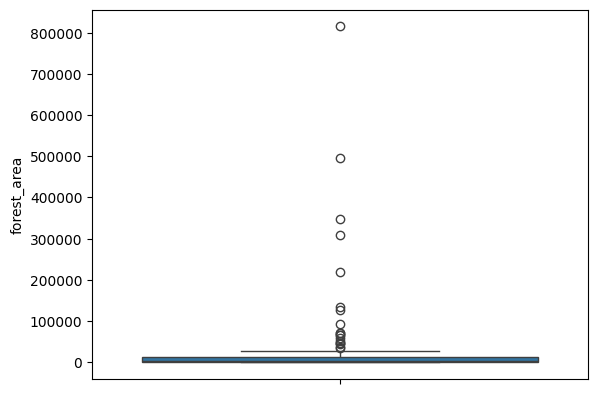

In [217]:
Q1 = lcdci_df_imputed['forest_area'].quantile(0.25)
Q3 = lcdci_df_imputed['forest_area'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['forest_area'] < lower_bound) | (lcdci_df_imputed['forest_area'] > upper_bound)]

sns.boxplot(y="forest_area", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'forest_area']]

,country,freshwater
8,Australia,492.0
23,Brazil,5661.0
31,Canada,2850.0
34,Chile,885.0
35,China,2812.9
36,Colombia,2145.0
46,Democratic Republic of the Congo,900.0
51,Ecuador,442.4
77,India,1446.0
78,Indonesia,2018.7


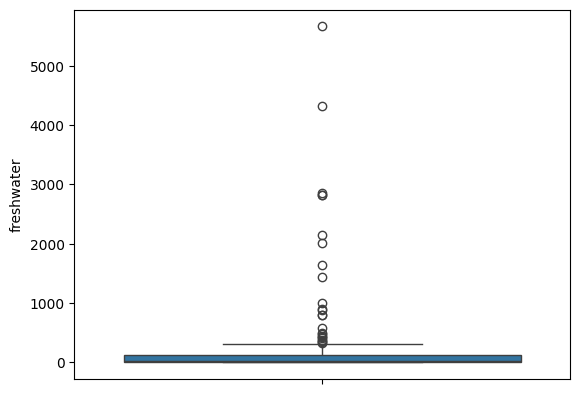

In [218]:
Q1 = lcdci_df_imputed['freshwater'].quantile(0.25)
Q3 = lcdci_df_imputed['freshwater'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['freshwater'] < lower_bound) | (lcdci_df_imputed['freshwater'] > upper_bound)]

sns.boxplot(y="freshwater", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'freshwater']]

,country,gdp_per_capita
3,Andorra,42072.319423
8,Australia,60697.245436
9,Austria,53517.890451
16,Belgium,51850.397184
31,Canada,52515.199835
47,Denmark,69268.651798
60,Finland,53504.693648
61,France,43671.308410
65,Germany,51426.750365
76,Iceland,68710.244201


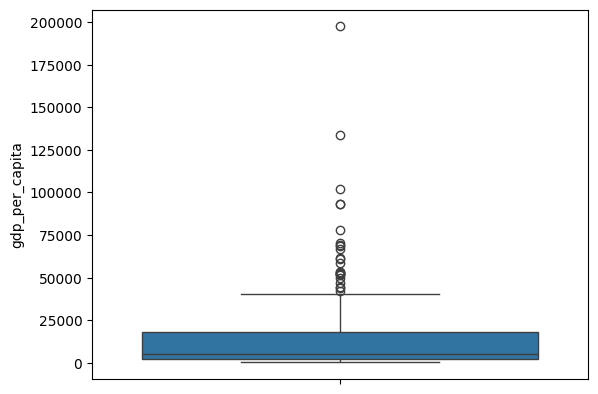

In [219]:
Q1 = lcdci_df_imputed['gdp_per_capita'].quantile(0.25)
Q3 = lcdci_df_imputed['gdp_per_capita'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['gdp_per_capita'] < lower_bound) | (lcdci_df_imputed['gdp_per_capita'] > upper_bound)]

sns.boxplot(y="gdp_per_capita", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'gdp_per_capita']]

,country,hdi


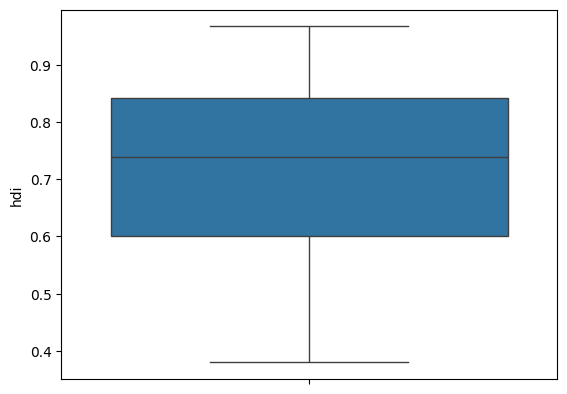

In [220]:
Q1 = lcdci_df_imputed['hdi'].quantile(0.25)
Q3 = lcdci_df_imputed['hdi'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['hdi'] < lower_bound) | (lcdci_df_imputed['hdi'] > upper_bound)]

sns.boxplot(y="hdi", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'hdi']]

,country,cooking_clean_fuel_and_technologies_access


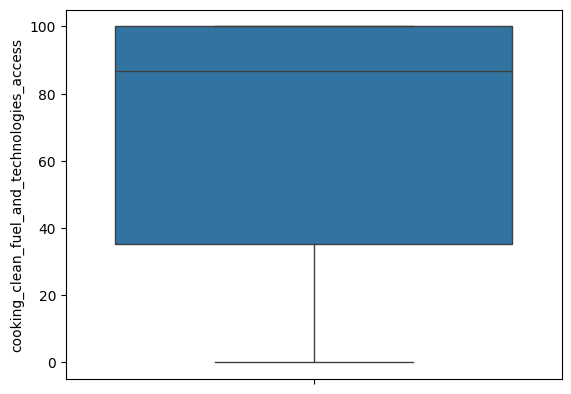

In [221]:
Q1 = lcdci_df_imputed['cooking_clean_fuel_and_technologies_access'].quantile(0.25)
Q3 = lcdci_df_imputed['cooking_clean_fuel_and_technologies_access'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['cooking_clean_fuel_and_technologies_access'] < lower_bound) | (lcdci_df_imputed['cooking_clean_fuel_and_technologies_access'] > upper_bound)]

sns.boxplot(y="cooking_clean_fuel_and_technologies_access", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'cooking_clean_fuel_and_technologies_access']]

,country,renewable_energy_consumption


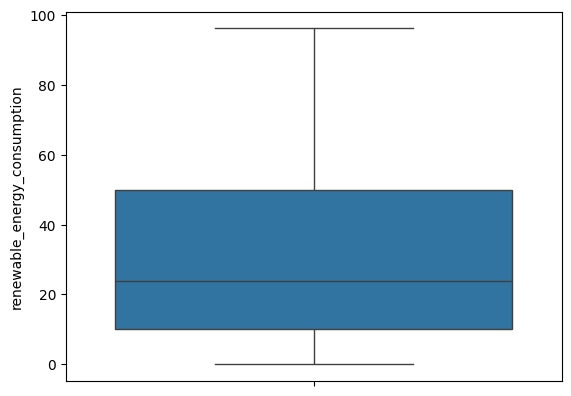

In [222]:
Q1 = lcdci_df_imputed['renewable_energy_consumption'].quantile(0.25)
Q3 = lcdci_df_imputed['renewable_energy_consumption'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['renewable_energy_consumption'] < lower_bound) | (lcdci_df_imputed['renewable_energy_consumption'] > upper_bound)]

sns.boxplot(y="renewable_energy_consumption", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'renewable_energy_consumption']]

,country,co2_emissions
2,Algeria,161563.0
8,Australia,378996.8
23,Brazil,414138.8
31,Canada,516873.7
35,China,10944686.2
52,Egypt,210752.3
61,France,267154.7
65,Germany,603350.5
77,India,2200836.3
78,Indonesia,563197.0


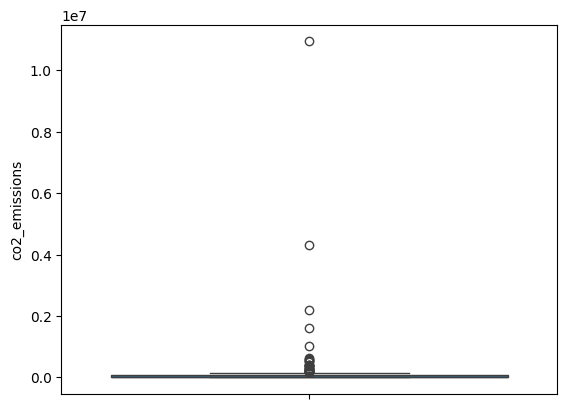

In [223]:
Q1 = lcdci_df_imputed['co2_emissions'].quantile(0.25)
Q3 = lcdci_df_imputed['co2_emissions'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['co2_emissions'] < lower_bound) | (lcdci_df_imputed['co2_emissions'] > upper_bound)]

sns.boxplot(y="co2_emissions", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'co2_emissions']]

,country,methane_emissions
2,Algeria,8.654392e+04
6,Argentina,1.310357e+05
8,Australia,1.314848e+05
13,Bangladesh,8.890400e+04
23,Brazil,4.492140e+05
31,Canada,1.001434e+05
35,China,1.186285e+06
36,Colombia,7.715640e+04
58,Ethiopia,9.464558e+04
77,India,6.976547e+05


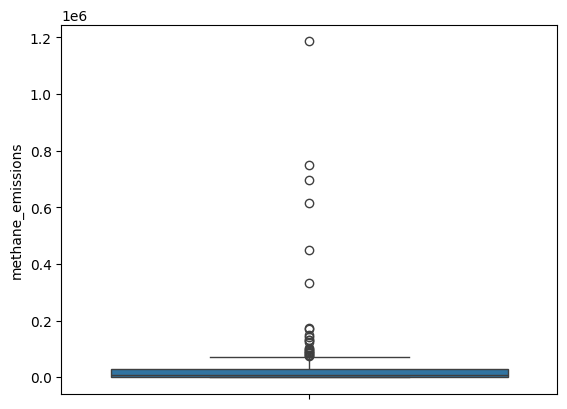

In [224]:
Q1 = lcdci_df_imputed['methane_emissions'].quantile(0.25)
Q3 = lcdci_df_imputed['methane_emissions'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['methane_emissions'] < lower_bound) | (lcdci_df_imputed['methane_emissions'] > upper_bound)]

sns.boxplot(y="methane_emissions", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'methane_emissions']]

,country,nitrous_oxide_emissions
6,Argentina,51061.49889
8,Australia,49331.81586
23,Brazil,191103.25170
30,Cameroon,62399.45337
31,Canada,47080.30993
35,China,536920.21030
58,Ethiopia,53761.30355
61,France,36202.71508
65,Germany,33815.10860
77,India,279003.79150


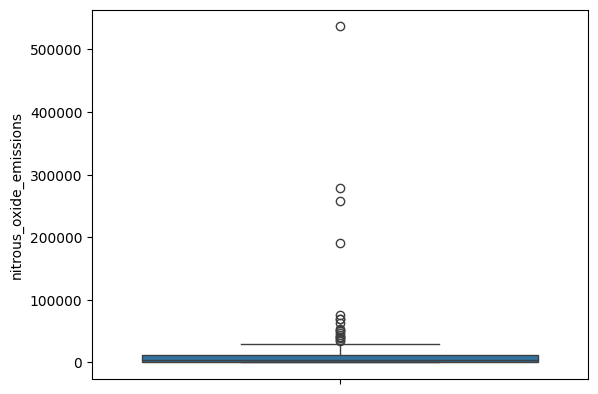

In [225]:
Q1 = lcdci_df_imputed['nitrous_oxide_emissions'].quantile(0.25)
Q3 = lcdci_df_imputed['nitrous_oxide_emissions'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['nitrous_oxide_emissions'] < lower_bound) | (lcdci_df_imputed['nitrous_oxide_emissions'] > upper_bound)]

sns.boxplot(y="nitrous_oxide_emissions", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'nitrous_oxide_emissions']]

In [227]:
lcdci_df_imputed.to_csv("lcdci.csv", index=False)